<a href="https://colab.research.google.com/github/denisecammarota/qbio2021/blob/main/Community_Chemostat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metacommunity approach

## Installing things

In [82]:
!pip install git+https://github.com/Emergent-Behaviors-in-Biology/community-simulator

  Cloning https://github.com/Emergent-Behaviors-in-Biology/community-simulator to /tmp/pip-req-build-bsfed031
  Running command git clone -q https://github.com/Emergent-Behaviors-in-Biology/community-simulator /tmp/pip-req-build-bsfed031


In [83]:
from IPython.display import Image
from community_simulator import *
from community_simulator.usertools import *
from community_simulator.visualization import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends import backend_pdf as bpdf

In [84]:
n_wells = 2
n_species = 3
n_resources = 1 #resources per species

## One well, various species, one resource

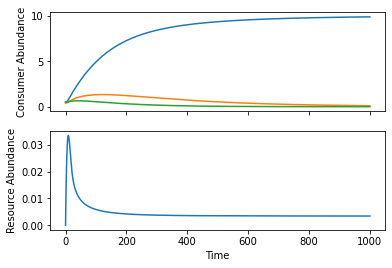

In [85]:
def sigma(R,params):
    return (np.ones(np.shape(['K'])).T*params['r']).T*R/(params['K']+np.ones(np.shape(['K']))*R)
def dNdt(N,R,params):
    #Version with soft minimum:
    #return N*((sigma(R,params)**params['alpha']).sum(axis=1)**(1/params['alpha'])-params['m'])
    return N*(np.min(sigma(R,params),axis=0)-params['m'])
def dRdt(N,R,params):
    #Version with soft minimum:
    #return (params['s']-R)*params['D'] - params['c'].T.dot(N*((sigma(R,params)**params['alpha']).sum(axis=1)**(1/params['alpha'])))
    return (params['s']-R)*params['D'] - params['c'].T.dot(N*np.min(sigma(R,params),axis=0))
dynamics = [dNdt,dRdt]
dimensions = {'SxM':['K','c'],
              'S':['r','m'],
              'M':['s','D']}

params = {'r':np.array([0.3,0.2,0.1]),
          'm':np.array([0.01,0.01,0.01]),
          'D':0.01,
          's':1,
          'K':np.array([0.1,0.1,0.1]).reshape(-1,1),
          'c':np.array([0.1,0.1,0.1]).reshape(-1,1),
         'alpha':-3}

init_state = [np.array([0.5,0.4,0.5]),np.ones(n_resources)*0]
#(parallel=False ensures that tutorial will run on Windows.
#If you are running on Mac or Linux, set parallel=True to speed up)
MyPlate = Community(init_state,dynamics,params,dimensions=dimensions,parallel=True)
t, Ntraj, Rtraj = MyPlate.TestWell(T=1000,ns=1000)

## Metacommunities, species with one resource in each patch

In [86]:
n_wells = 2
init_state = [np.random.rand(3,n_wells),np.ones((1,n_wells))*0]
#(parallel=False ensures that tutorial will run on Windows.
#If you are running on Mac or Linux, set parallel=True to speed up)
MyPlate = Community(init_state,dynamics,params,dimensions=dimensions,parallel=True)
f = np.eye(n_wells)
Ntraj,Rtraj = MyPlate.RunExperiment(f,70,500,refresh_resource=False)
#f transfer matrix
#the first is time interval for propagation between transfers
#number of repetitions to execute

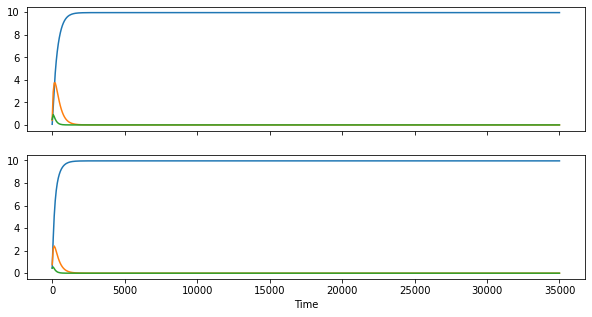

In [87]:
PlotTraj(Ntraj, plottype = 'line',figsize = (10,5))

In [88]:
n_wells = 2
init_state = [np.random.rand(3,n_wells),np.ones((1,n_wells))*0]
#(parallel=False ensures that tutorial will run on Windows.
#If you are running on Mac or Linux, set parallel=True to speed up)
MyPlate = Community(init_state,dynamics,params,dimensions=dimensions,parallel=True)
f = np.eye(n_wells)+0.8
for i in range(n_wells):
  f[i,i] = 1
Ntraj,Rtraj = MyPlate.RunExperiment(f,50,100,refresh_resource=False)

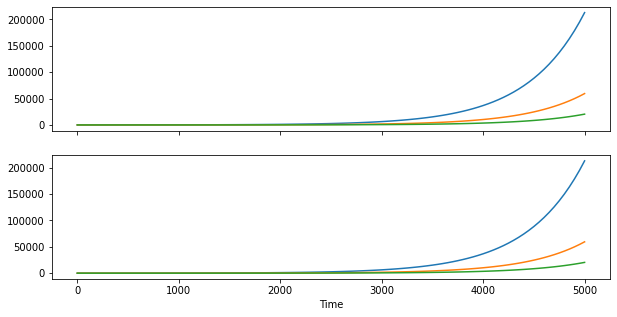

In [89]:
PlotTraj(Ntraj, plottype = 'line',figsize = (10,5))

In [90]:
n_wells = 2
init_state = [np.random.rand(3,n_wells),np.ones((1,n_wells))*0]
#(parallel=False ensures that tutorial will run on Windows.
#If you are running on Mac or Linux, set parallel=True to speed up)
MyPlate = Community(init_state,dynamics,params,dimensions=dimensions,parallel=True)
f = np.eye(n_wells)+0.4
for i in range(n_wells):
  f[i,i] = 1
Ntraj,Rtraj = MyPlate.RunExperiment(f,55,50,refresh_resource=False)

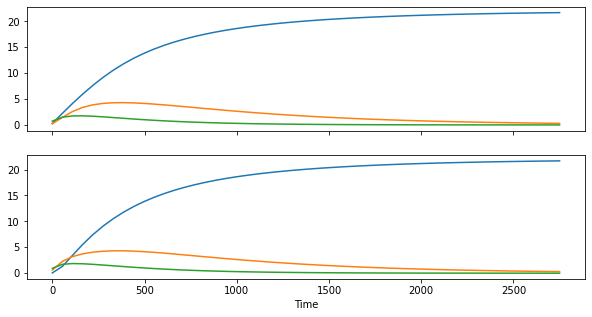

In [91]:
PlotTraj(Ntraj, plottype = 'line',figsize = (10,5))

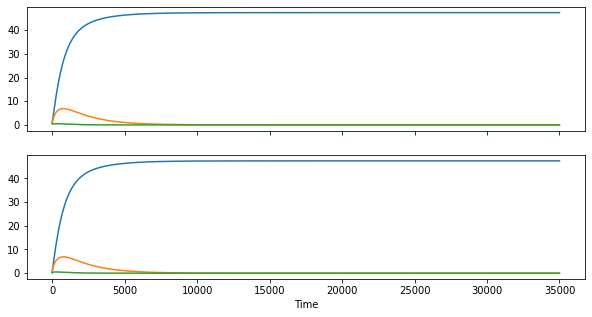

In [95]:
n_wells = 2
init_state = [np.random.rand(3,n_wells),np.random.rand(1,n_wells)*0.05]
#(parallel=False ensures that tutorial will run on Windows.
#If you are running on Mac or Linux, set parallel=True to speed up)
MyPlate = Community(init_state,dynamics,params,dimensions=dimensions,parallel=True)
f = np.eye(n_wells)+0.8
for i in range(n_wells):
  f[i,i] = 1
Ntraj,Rtraj = MyPlate.RunExperiment(f,70,500,refresh_resource=False)
#f transfer matrix
#the first is time interval for propagation between transfers
#number of repetitions to execute
PlotTraj(Ntraj, plottype = 'line',figsize = (10,5))

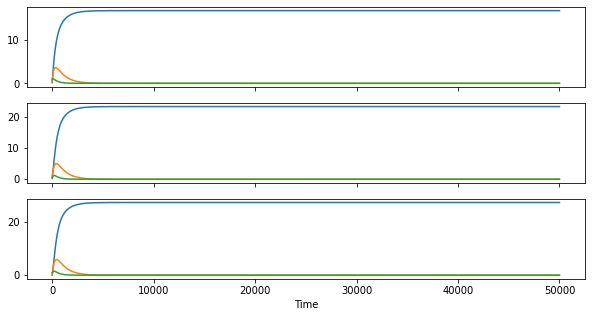

In [105]:
n_wells = 3
init_state = [np.random.rand(3,n_wells),np.random.rand(1,n_wells)*0]
#(parallel=False ensures that tutorial will run on Windows.
#If you are running on Mac or Linux, set parallel=True to speed up)
MyPlate = Community(init_state,dynamics,params,dimensions=dimensions,parallel=True)
f = np.random.rand(n_wells,n_wells)
for i in range(n_wells):
  f[i,i] = 1
Ntraj,Rtraj = MyPlate.RunExperiment(f,100,500,refresh_resource=False)
#f transfer matrix
#the first is time interval for propagation between transfers
#number of repetitions to execute
PlotTraj(Ntraj, plottype = 'line',figsize = (10,5))

In [106]:
f

array([[1.        , 0.44657259, 0.04014483],
       [0.77239832, 1.        , 0.36370118],
       [0.5593216 , 0.8827638 , 1.        ]])